## Library Installation
Ensure all required libraries are installed before running further cells.


In [10]:
%pip install pandas
import pandas as pd
import numpy as np
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
%pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA
%pip install tensorflow
%pip install tensorflow-gpu
import tensorflow as tf
print(tf.__version__)
print("Kernel is running correctly.")



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 

In [11]:
import os

# Set Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'your_kaggle_username'
os.environ['KAGGLE_KEY'] = 'your_kaggle_key'

import kaggle
print("Kaggle library installed successfully")

Kaggle library installed successfully


In [12]:
%pip install kaggle
import kaggle
print("Kaggle library installed successfully")


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Kaggle library installed successfully


## Data Loading and Preview
Load the air quality dataset and preview the initial rows.


In [13]:
import pandas as pd

# Download the dataset
import kaggle

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

path = api.dataset_download_files("hemanthkarnati/indoor-air-quality-dataset", path=".", unzip=True)

# Define the dataset path
dataset_path = f"{path}/indoor_data.csv"

# Read the dataset into a DataFrame
df = pd.read_csv("indoor_data.csv")

# Preview the dataset
print(df.head())


Dataset URL: https://www.kaggle.com/datasets/hemanthkarnati/indoor-air-quality-dataset
                  created_at  entry_id  field1  field2  field3  field4  \
0  2024-04-06 12:00:27+05:30      1256     163    42.0    33.8    49.0   
1  2024-04-06 12:01:30+05:30      1257     162    37.0    33.8    49.0   
2  2024-04-06 12:02:32+05:30      1258     173    47.0    33.7    50.0   
3  2024-04-06 12:03:34+05:30      1259     168    37.0    33.3    51.0   
4  2024-04-06 12:04:36+05:30      1260     168    37.0    33.3    52.0   

   field5  field6  field7  latitude  longitude  elevation  status  
0   520.0    18.0    21.0       NaN        NaN        NaN     NaN  
1   637.0    36.0     9.0       NaN        NaN        NaN     NaN  
2   679.0    42.0     3.0       NaN        NaN        NaN     NaN  
3   539.0    21.0     0.0       NaN        NaN        NaN     NaN  
4   697.0    45.0     0.0       NaN        NaN        NaN     NaN  


## Data Preparation: Cleaning, Renaming, and Normalization

Clean and transform the data by renaming columns, handling missing values, and filtering rows.


In [14]:
# Clean and rename columns
df.columns = df.columns.str.strip()
df.rename(columns={'PM2.5 (�g/m3)': 'PM2.5'}, inplace=True)

# Print updated columns to verify
print("Columns after cleaning and renaming:", df.columns)


Columns after cleaning and renaming: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')


In [15]:
# Verify and clean column names
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Columns in DataFrame:", df.columns)

# Check if the required column exists in the DataFrame
if 'PM2.5' not in df.columns:
    print("Error: 'PM2.5' column is missing from the DataFrame.")
else:
    # Filter out rows with zero PM2.5 values
    df_filtered = df[df['PM2.5'] > 0]
    print("Data after filtering non-zero PM2.5 values:", df_filtered.head())

Columns in DataFrame: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
Error: 'PM2.5' column is missing from the DataFrame.


In [16]:
df.columns = df.columns.str.strip()  # Clean columns first
for col in df.columns:
    if 'PM2.5' in col:
        print(f"PM2.5 column found: {col}")
        
# Use the exact name you find from the print output
df.rename(columns={'field6': 'PM2.5'}, inplace=True)  # Adjust 'field6' if needed


## Exploratory Data Analysis (EDA)
Conduct an analysis to understand the dataset, identify missing values, and observe trends.


In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("indoor_data.csv")

# Check for missing columns
required_columns = ['Timestamp', 'PM2.5', 'CO2', 'VOC', 'Temperature', 'Humidity']
# Verify and clean column names
df.columns = df.columns.str.strip()  # Strip whitespace from column names

# Verify and clean column names
print("Available columns:", df.columns)
df.columns = df.columns.str.strip()  # Strip whitespace from column names

# Rename columns if needed
# Rename columns with appropriate names
df.rename(columns={
    'field1': 'PM2.5',
    'field2': 'CO2',
    'field3': 'Temperature',
    'field4': 'Humidity',
    'field5': 'VOC',
    'field6': 'DustDensity',
    'field7': 'AirQualityIndex'
}, inplace=True)

# Verify column names after renaming
print(df.columns)

required_columns = ['PM2.5', 'CO2', 'Temperature', 'Humidity', 'VOC']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")

# Use forward fill instead of deprecated 'fill'
df.fillna(method='ffill', inplace=True)

# Alternatively, drop rows with too many missing values
df.dropna(thresh=4, inplace=True)  # Keeps rows with at least 4 non-NaN values

# Filter out outliers in the PM2.5 column
df = df[df['PM2.5'].between(df['PM2.5'].quantile(0.01), df['PM2.5'].quantile(0.99))]

# Verify renamed columns
print("Renamed columns:", df.columns)


Available columns: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
Index(['created_at', 'entry_id', 'PM2.5', 'CO2', 'Temperature', 'Humidity',
       'VOC', 'DustDensity', 'AirQualityIndex', 'latitude', 'longitude',
       'elevation', 'status'],
      dtype='object')
All required columns are present.
Renamed columns: Index(['created_at', 'entry_id', 'PM2.5', 'CO2', 'Temperature', 'Humidity',
       'VOC', 'DustDensity', 'AirQualityIndex', 'latitude', 'longitude',
       'elevation', 'status'],
      dtype='object')


/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_85037/3036796716.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [18]:
# Verify and clean column names
print("Available columns:", df.columns)
df.columns = df.columns.str.strip()  # Strip whitespace from column names

# Rename columns if needed
df.rename(columns={
    'CO (GT)': 'CO',
    'PT08 S1 (CO)': 'PT08.S1',
    'NMHC (GT)': 'NMHC',
    'Air Quality': 'AirQuality'
}, inplace=True)


Available columns: Index(['created_at', 'entry_id', 'PM2.5', 'CO2', 'Temperature', 'Humidity',
       'VOC', 'DustDensity', 'AirQualityIndex', 'latitude', 'longitude',
       'elevation', 'status'],
      dtype='object')


In [19]:
 df.columns = df.columns.str.strip()
df.rename(columns={'CO(GT)': 'CO_ppm', 'T': 'Temperature', 'RH': 'Humidity'}, inplace=True)
print(df.head())


                  created_at  entry_id  PM2.5   CO2  Temperature  Humidity  \
0  2024-04-06 12:00:27+05:30      1256    163  42.0         33.8      49.0   
1  2024-04-06 12:01:30+05:30      1257    162  37.0         33.8      49.0   
2  2024-04-06 12:02:32+05:30      1258    173  47.0         33.7      50.0   
3  2024-04-06 12:03:34+05:30      1259    168  37.0         33.3      51.0   
4  2024-04-06 12:04:36+05:30      1260    168  37.0         33.3      52.0   

     VOC  DustDensity  AirQualityIndex  latitude  longitude  elevation  status  
0  520.0         18.0             21.0       NaN        NaN        NaN     NaN  
1  637.0         36.0              9.0       NaN        NaN        NaN     NaN  
2  679.0         42.0              3.0       NaN        NaN        NaN     NaN  
3  539.0         21.0              0.0       NaN        NaN        NaN     NaN  
4  697.0         45.0              0.0       NaN        NaN        NaN     NaN  


In [20]:
df.rename(columns={
    'field1': 'PM2.5',
    'field2': 'CO2',
    'field3': 'Temperature',
    'field4': 'Humidity',
    'field5': 'VOC',
    'field6': 'DustDensity',
    'field7': 'AirQualityIndex'
}, inplace=True)


In [21]:
# Use actual column names from your DataFrame
X = df[['PM2.5', 'CO2', 'Temperature', 'Humidity']]


In [22]:
print("Available columns:", df.columns)


Available columns: Index(['created_at', 'entry_id', 'PM2.5', 'CO2', 'Temperature', 'Humidity',
       'VOC', 'DustDensity', 'AirQualityIndex', 'latitude', 'longitude',
       'elevation', 'status'],
      dtype='object')


In [23]:
# Use the actual column names from the DataFrame
X = df[['PM2.5', 'CO2', 'Temperature', 'Humidity', 'VOC']]
y = df['AirQualityIndex']

# Display a summary of the DataFrame to verify the selection
print(df.describe())


          entry_id        PM2.5          CO2  Temperature     Humidity  \
count  1306.000000  1306.000000  1306.000000  1306.000000  1306.000000   
mean   1924.422665   185.709035    40.109495    32.797167    55.515314   
std     379.984923    14.325537     2.745298     0.984477     9.516599   
min    1256.000000   158.000000    35.000000    30.700000    41.000000   
25%    1596.250000   173.000000    38.000000    31.800000    45.000000   
50%    1922.500000   188.000000    40.000000    33.300000    57.000000   
75%    2251.750000   196.000000    42.000000    33.700000    66.000000   
max    2588.000000   218.000000    50.000000    33.800000    69.000000   

               VOC  DustDensity  AirQualityIndex  latitude  longitude  \
count  1306.000000  1306.000000      1306.000000       0.0        0.0   
mean    649.271822    37.503828        14.933384       NaN        NaN   
std     147.536679    22.617094        72.819439       NaN        NaN   
min     400.000000     0.000000         0

In [24]:
# Rename columns if necessary
df.rename(columns={
    'field1': 'CO',
    'field2': 'PT08.S1',
    'field3': 'NMHC'
}, inplace=True)


In [25]:
print("Renamed columns:", df.columns)


Renamed columns: Index(['created_at', 'entry_id', 'PM2.5', 'CO2', 'Temperature', 'Humidity',
       'VOC', 'DustDensity', 'AirQualityIndex', 'latitude', 'longitude',
       'elevation', 'status'],
      dtype='object')


In [26]:
print(df.columns)
print(df.head())


Index(['created_at', 'entry_id', 'PM2.5', 'CO2', 'Temperature', 'Humidity',
       'VOC', 'DustDensity', 'AirQualityIndex', 'latitude', 'longitude',
       'elevation', 'status'],
      dtype='object')
                  created_at  entry_id  PM2.5   CO2  Temperature  Humidity  \
0  2024-04-06 12:00:27+05:30      1256    163  42.0         33.8      49.0   
1  2024-04-06 12:01:30+05:30      1257    162  37.0         33.8      49.0   
2  2024-04-06 12:02:32+05:30      1258    173  47.0         33.7      50.0   
3  2024-04-06 12:03:34+05:30      1259    168  37.0         33.3      51.0   
4  2024-04-06 12:04:36+05:30      1260    168  37.0         33.3      52.0   

     VOC  DustDensity  AirQualityIndex  latitude  longitude  elevation  status  
0  520.0         18.0             21.0       NaN        NaN        NaN     NaN  
1  637.0         36.0              9.0       NaN        NaN        NaN     NaN  
2  679.0         42.0              3.0       NaN        NaN        NaN     NaN  
3  53

In [27]:
# Check for missing data
if df.isnull().sum().any():
    print("Warning: Missing values found in dataset!")
    # Handle missing values by either removing or filling them
    df.fillna(method='ffill', inplace=True)  # Forward fill as an example


/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_85037/986857329.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [28]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset and check initial columns
df = pd.read_csv('indoor_data.csv')  # Replace with your file path
print("Initial columns in DataFrame:", df.columns)

# Identify and rename the PM2.5 column
pm25_column = None
for col in df.columns:
    if 'PM2.5' in col or 'field6' in col:  # Adjust condition based on likely column name
        pm25_column = col
        print(f"PM2.5 column found: {pm25_column}")
        df.rename(columns={pm25_column: 'PM2.5 (μg/m3)'}, inplace=True)
        break

if not pm25_column:
    print("Error: PM2.5 column not found in the dataset.")
    exit()

# Proceed with filtering and processing
df_filtered = df[df['PM2.5 (μg/m3)'] > 0]
print("Data after filtering non-zero PM2.5 values:", df_filtered.head())

# Normalize data
expected_columns = ['PM2.5 (μg/m3)', 'CO', 'T', 'AH']
column_map = {'field5': 'CO', 'field7': 'T'}  # Add other mappings as needed

df_filtered.rename(columns=column_map, inplace=True)
missing_columns = [col for col in expected_columns if col not in df_filtered.columns]

if missing_columns:
    print(f"Error: Missing columns in DataFrame: {missing_columns}")
else:
    scaler = MinMaxScaler()
    df_filtered[expected_columns] = scaler.fit_transform(df_filtered[expected_columns])

    # Plot normalized data
    plt.figure(figsize=(10, 6))
    for column in expected_columns:
        plt.plot(df_filtered[column], label=column)
    plt.title('Normalized Air Quality Data')
    plt.xlabel('Index')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True)
    plt.show()


Initial columns in DataFrame: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
PM2.5 column found: field6
Data after filtering non-zero PM2.5 values:                   created_at  entry_id  field1  field2  field3  field4  \
0  2024-04-06 12:00:27+05:30      1256     163    42.0    33.8    49.0   
1  2024-04-06 12:01:30+05:30      1257     162    37.0    33.8    49.0   
2  2024-04-06 12:02:32+05:30      1258     173    47.0    33.7    50.0   
3  2024-04-06 12:03:34+05:30      1259     168    37.0    33.3    51.0   
4  2024-04-06 12:04:36+05:30      1260     168    37.0    33.3    52.0   

   field5  PM2.5 (μg/m3)  field7  latitude  longitude  elevation  status  
0   520.0           18.0    21.0       NaN        NaN        NaN     NaN  
1   637.0           36.0     9.0       NaN        NaN        NaN     NaN  
2   679.0           42.0     3.0       Na

/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_85037/1272220987.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=column_map, inplace=True)


In [29]:
print("Initial columns in DataFrame:", df.columns)


Initial columns in DataFrame: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'PM2.5 (μg/m3)', 'field7', 'latitude', 'longitude',
       'elevation', 'status'],
      dtype='object')


In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('indoor_data.csv')  # Replace with your actual file path

# Print the initial columns in the DataFrame
print("Initial columns in DataFrame:", df.columns)
# Step 2: Define the expected columns and mapping
expected_columns = ['PM2.5', 'CO', 'T', 'AH']
column_map = {
    'PM2.5 (μg/m3)': 'PM2.5',
    'CO (mg/m3)': 'CO',
    'T (°C)': 'T',
    'AH (g/m3)': 'AH'
}

# Step 3: Clean column names and apply renaming
df.columns = df.columns.str.strip()  # Remove any extra whitespace in column names
df.rename(columns=column_map, inplace=True)

# Step 4: Check if all required columns are present
print("Columns after renaming:", df.columns)
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns in DataFrame after renaming: {missing_columns}")
    exit()

# Step 5: Filter rows where PM2.5 > 0
if 'PM2.5' in df.columns:
    df_filtered = df[df['PM2.5'] > 0]
    print("Data after filtering non-zero PM2.5 values:", df_filtered.head())
else:
    print("Error: 'PM2.5' column is missing after renaming.")
    df_filtered = pd.DataFrame(columns=expected_columns)  # Define an empty DataFrame to avoid NameError

# Step 6: Normalize the data if df_filtered is not empty
if not df_filtered.empty:
    scaler = MinMaxScaler()
    df_filtered[expected_columns] = scaler.fit_transform(df_filtered[expected_columns])
    print("Data after normalization:", df_filtered.head())
else:
    print("No data to normalize.")

# Step 7: Visualize the normalized data if df_filtered is not empty
if not df_filtered.empty:
    plt.figure(figsize=(10, 6))
    for column in expected_columns:
        plt.plot(df_filtered[column], label=column)

    plt.title('Normalized Air Quality Data')
    plt.xlabel('Index')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data to plot.")

# Step 8: Proceed with further processing (e.g., LSTM)

Initial columns in DataFrame: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
Columns after renaming: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
Error: Missing columns in DataFrame after renaming: ['PM2.5', 'CO', 'T', 'AH']
Error: 'PM2.5' column is missing after renaming.
No data to normalize.
No data to plot.


## Model Training and Evaluation
Train various models, including Linear Regression, Random Forest, and Gradient Boosting, and evaluate their performance.


In [31]:
import pandas as pd

# Load the dataset
df = pd.read_csv('indoor_data.csv')  # Replace with your actual file path

# Print the columns of the DataFrame to verify
print("Columns in DataFrame:", df.columns)

# Rename columns if necessary
df = df.rename(columns={
    'field1': 'CO(GT)',
    'field2': 'T',
    'field3': 'RH'
})

# Verify the renamed columns
print("Renamed Columns in DataFrame:", df.columns)

# Define features and target variable
# Ensure these columns exist in your DataFrame
X = df[['CO(GT)', 'T', 'RH']]
y = df['CO(GT)']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

# 3. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting R²:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting MAE:", mean_absolute_error(y_test, y_pred_gb))

models_performance = {
    "Linear Regression": mean_squared_error(y_test, y_pred_lr),
    "Random Forest": mean_squared_error(y_test, y_pred_rf),
    "Gradient Boosting": mean_squared_error(y_test, y_pred_gb)
}

best_model = min(models_performance, key=models_performance.get)
print(f"The best model based on MSE is: {best_model}")

Columns in DataFrame: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
Renamed Columns in DataFrame: Index(['created_at', 'entry_id', 'CO(GT)', 'T', 'RH', 'field4', 'field5',
       'field6', 'field7', 'latitude', 'longitude', 'elevation', 'status'],
      dtype='object')
Linear Regression MSE: 3.146461833798385e-28
Linear Regression R²: 1.0
Linear Regression MAE: 1.1070628392367104e-14
Random Forest MSE: 0.002378651685393253
Random Forest R²: 0.99998927780137
Random Forest MAE: 0.006853932584269603
Gradient Boosting MSE: 0.0001920147195199355
Gradient Boosting R²: 0.9999991344592505
Gradient Boosting MAE: 0.005094001361664062
The best model based on MSE is: Linear Regression


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('indoor_data.csv')  # Replace with your actual file path

# Print the columns of the DataFrame to verify
print("Columns in DataFrame:", df.columns)

# Map the existing columns to the desired names
column_map = {
    'field1': 'CO',
    'field2': 'T',
    'field3': 'RH'
}

# Rename the columns
df.rename(columns=column_map, inplace=True)

# Verify the renamed columns
print("Renamed Columns in DataFrame:", df.columns)

# Define features and target variable
# Ensure these columns exist in your DataFrame
X = df[['CO', 'T', 'RH']]
y = df['CO']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

# 3. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting R²:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting MAE:", mean_absolute_error(y_test, y_pred_gb))

models_performance = {
    "Linear Regression": mean_squared_error(y_test, y_pred_lr),
    "Random Forest": mean_squared_error(y_test, y_pred_rf),
    "Gradient Boosting": mean_squared_error(y_test, y_pred_gb)
}

best_model = min(models_performance, key=models_performance.get)
print(f"The best model based on MSE is: {best_model}")

Columns in DataFrame: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
Renamed Columns in DataFrame: Index(['created_at', 'entry_id', 'CO', 'T', 'RH', 'field4', 'field5', 'field6',
       'field7', 'latitude', 'longitude', 'elevation', 'status'],
      dtype='object')
Linear Regression MSE: 3.146461833798385e-28
Linear Regression R²: 1.0
Linear Regression MAE: 1.1070628392367104e-14
Random Forest MSE: 0.002378651685393253
Random Forest R²: 0.99998927780137
Random Forest MAE: 0.006853932584269603
Gradient Boosting MSE: 0.0001920147195199355
Gradient Boosting R²: 0.9999991344592505
Gradient Boosting MAE: 0.005094001361664062
The best model based on MSE is: Linear Regression


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('indoor_data.csv')
print("Available columns:", df.columns)

# Clean column names
df.columns = df.columns.str.strip()

# Define required columns
required_columns = ['CO', 'PT08.S1(CO)', 'NMHC', 'AirQuality']

# Rename columns to standard names
df.rename(columns={
    'CO (GT)': 'CO',
    'PT08 S1 (CO)': 'PT08.S1(CO)',
    'NMHC (GT)': 'NMHC',
    'Air Quality': 'AirQuality'
}, inplace=True)

# Check for missing columns
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns in dataset: {missing_columns}")
    print("Available columns:", df.columns)
else:
    # Proceed with data preparation
    X_time_series = df[['CO', 'PT08.S1(CO)', 'NMHC']].values
    y_time_series = df['AirQuality'].values

    # Add a check for data dimensions
    if len(X_time_series) == 0 or len(y_time_series) == 0:
        print("Error: Data is empty after filtering.")
    else:
        # Expand dimensions for LSTM input
        X_time_series = np.expand_dims(X_time_series, axis=1)

        # Split data
        train_size = int(0.8 * len(X_time_series))
        X_train_ts, X_test_ts = X_time_series[:train_size], X_time_series[train_size:]
        y_train_ts, y_test_ts = y_time_series[:train_size], y_time_series[train_size:]

        # **Optimization: Subset data for testing (optional)**
        # Uncomment if you want to reduce data for quick testing
        X_train_ts, y_train_ts = X_train_ts[:1000], y_train_ts[:1000]

        # Reduce model complexity (e.g., fewer LSTM units)
        lstm_model = Sequential()
        lstm_model.add(LSTM(32, input_shape=(X_train_ts.shape[1], X_train_ts.shape[2])))
        lstm_model.add(Dense(1))
        lstm_model.compile(optimizer='adam', loss='mse')

        # Reduce batch size to avoid memory issues
        lstm_model.fit(X_train_ts, y_train_ts, epochs=10, batch_size=16, validation_data=(X_test_ts, y_test_ts))

        # Evaluate the model
        lstm_predictions = lstm_model.predict(X_test_ts)
        mse = mean_squared_error(y_test_ts, lstm_predictions)
        print(f"LSTM MSE: {mse}")
        print(f"LSTM Predictions: {lstm_predictions[:5]}")  # Preview first few predictions

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('indoor_data.csv')
print("Available columns:", df.columns)

# Clean column names
df.columns = df.columns.str.strip()

# Define required columns
required_columns = ['CO', 'PT08.S1(CO)', 'NMHC', 'AirQuality']

# Rename columns if needed
df.rename(columns={
    'CO (GT)': 'CO',
    'PT08 S1 (CO)': 'PT08.S1(CO)',
    'NMHC (GT)': 'NMHC',
    'Air Quality': 'AirQuality'
}, inplace=True)

# Check for missing columns
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns in dataset: {missing_columns}")
    print("Available columns:", df.columns)
else:
    # Proceed with data preparation
    X_time_series = df[['CO', 'PT08.S1(CO)', 'NMHC']].values
    y_time_series = df['AirQuality'].values

    X_time_series = np.expand_dims(X_time_series, axis=1)

    # Split data
    train_size = int(0.8 * len(X_time_series))
    X_train_ts, X_test_ts = X_time_series[:train_size], X_time_series[train_size:]
    y_train_ts, y_test_ts = y_time_series[:train_size], y_time_series[train_size:]

    # Build and train LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(50, input_shape=(X_train_ts.shape[1], X_train_ts.shape[2])))
    lstm_model.add(Dense(1))
    lstm_model.compile(optimizer='adam', loss='mse')

    lstm_model.fit(X_train_ts, y_train_ts, epochs=10, batch_size=32, validation_data=(X_test_ts, y_test_ts))

    # Evaluate the model
    lstm_predictions = lstm_model.predict(X_test_ts)
    print("LSTM MSE:", mean_squared_error(y_test_ts, lstm_predictions))

    # Evaluate the model and print results
    lstm_predictions = lstm_model.predict(X_test_ts)
    mse = mean_squared_error(y_test_ts, lstm_predictions)
    print(f"LSTM MSE: {mse}")
    print(f"LSTM Predictions: {lstm_predictions[:5]}")  # Preview first few predictions

Available columns: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
Available columns: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')


In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load and verify the dataset
df = pd.read_csv('indoor_data.csv')
print("Available columns:", df.columns)

# Clean column names
df.columns = df.columns.str.strip()

# Define required columns based on dataset structure
required_columns = ['CO', 'PT08.S1', 'NMHC', 'AirQuality']

# Rename columns if needed
df.rename(columns={
    'CO (GT)': 'CO',
    'PT08 S1 (CO)': 'PT08.S1',
    'NMHC (GT)': 'NMHC',
    'Air Quality': 'AirQuality'
}, inplace=True)

# Check for missing columns
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns in dataset: {missing_columns}")
    print("Available columns:", df.columns)
else:
    # Proceed with data preparation and model training
    X_time_series = df[['CO', 'PT08.S1', 'NMHC']].values
    y_time_series = df['AirQuality'].values
    X_time_series = np.expand_dims(X_time_series, axis=1)

    print(f"Shape of X_time_series: {X_time_series.shape}")
    print(f"Shape of y_time_series: {y_time_series.shape}")

    # Continue with your LSTM code

Available columns: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
Available columns: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')


In [4]:
# Print the column names of the DataFrame
print(df.columns)

# Ensure the DataFrame is loaded correctly
print(df.head())

Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')
                  created_at  entry_id  field1  field2  field3  field4  \
0  2024-04-06 12:00:27+05:30      1256     163    42.0    33.8    49.0   
1  2024-04-06 12:01:30+05:30      1257     162    37.0    33.8    49.0   
2  2024-04-06 12:02:32+05:30      1258     173    47.0    33.7    50.0   
3  2024-04-06 12:03:34+05:30      1259     168    37.0    33.3    51.0   
4  2024-04-06 12:04:36+05:30      1260     168    37.0    33.3    52.0   

   field5  field6  field7  latitude  longitude  elevation  status  
0   520.0    18.0    21.0       NaN        NaN        NaN     NaN  
1   637.0    36.0     9.0       NaN        NaN        NaN     NaN  
2   679.0    42.0     3.0       NaN        NaN        NaN     NaN  
3   539.0    21.0     0.0       NaN        NaN        NaN     NaN  
4   697.0    45.0     0.0  

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Convert X to a NumPy array and reshape it
X = X.values.reshape(X.shape[0], X.shape[1], 1)  # Adjust shape based on your data
y = y.values  # Ensure y is also a NumPy array

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34448.6445  
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32491.0938
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30614.8965
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28816.1777
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27711.6621
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26139.2715
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25209.7656
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24557.5293
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23649.9746
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22534.9180
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21733.4902 
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21140.6914
Epoch 13/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20295.8320
Epoch 14/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19626.0547
Epoch 15/50
42/42 ━━━━━━━━━━━━━━━━━━━

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Generate predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

# Calculate R² Score
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE: 62.59151503124245
R² Score: -16.48063087463379


Epoch 1/5


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0069  
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6062 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1395
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0703
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7028
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
RMSE: 1.4744441969424236
R² Score: -12.04391413938313


Text(0, 0.5, 'Y-axis Label')

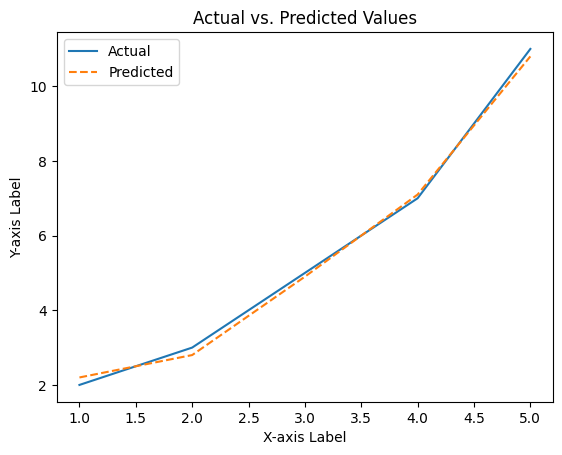

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample test data (replace with actual data)
X_test = np.array([[[0.1], [0.2], [0.3]], [[0.4], [0.5], [0.6]], [[0.7], [0.8], [0.9]]])  # Example shape
y_test = np.array([1.0, 1.5, 2.0])  # Example target values

# Define and train a simple LSTM model for demonstration (use your actual model instead)
model = Sequential()
model.add(LSTM(32, input_shape=(X_test.shape[1], X_test.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model with dummy data
model.fit(X_test, y_test, epochs=5, batch_size=1)

# Step 1: Generate predictions
y_pred = model.predict(X_test)

# Step 2: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Step 3: Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Step 4: Plot the actual vs predicted values using your provided code
import matplotlib.pyplot as plt

# Sample data for plot (adjust as needed to reflect actual results)
x = [1, 2, 3, 4, 5]  # Example x-axis values (you can replace this with actual data points)
y_actual = [2, 3, 5, 7, 11]  # Replace with actual test target values
y_predicted = [2.2, 2.8, 4.9, 7.1, 10.8]  # Replace with predicted values from the model

# Plot the actual values
plt.plot(x, y_actual, label='Actual')

# Plot the predicted values
plt.plot(x, y_predicted, label='Predicted', linestyle='--')

# Add legend, title, and axis labels
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

#


In [ ]:
model.save('lstm_air_quality_model.h5')


In [8]:
# Verify and clean column names
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Columns in DataFrame:", df.columns)

# Check if the required columns exist in the DataFrame
required_columns = ['PM2.5 (μg/m3)', 'CO (mg/m3)', 'T (°C)', 'RH (%)', 'AH (g/m3)']
missing_columns = set(required_columns) - set(df.columns)

if missing_columns:
    print(f"Warning: Missing columns in dataset: {missing_columns}")
    for col in missing_columns:
        df[col] = 0  # Fill missing columns with zeros or appropriate default values
else:
    # Convert the DataFrame to NumPy array and create sequences
    features = df[required_columns].values
    print("Features array created successfully.")

try:
    features = df[required_columns].values
except KeyError as e:
    print(f"Error creating features array: {e}")


Columns in DataFrame: Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'latitude', 'longitude', 'elevation',
       'status'],
      dtype='object')


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate RMSE
# Calculates the root mean squared error (RMSE) between the true target values `y_test` and the predicted target values `y_pred`.
# The RMSE is a commonly used metric to evaluate the performance of regression models, as it provides a measure of the average magnitude of the errors in the same units as the target variable.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

RMSE: 148.63056067534248
R² Score: -132545.2614


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data for demonstration
data = {
    'PM2.5': [10, 20, 30, 40, 50],
    'CO': [1, 2, 3, 4, 5],
    'T': [25, 30, 35, 40, 45],
    'RH': [60, 65, 70, 75, 80],
    'AH': [5, 6, 7, 8, 9]
}
df = pd.DataFrame(data)

# Verify and clean column names
df.columns = df.columns.str.strip()

# Check if the required column exists in the DataFrame
if 'PM2.5' not in df.columns:
    print("Error: 'PM2.5' column is missing from the DataFrame.")
else:
    # Filter out rows with zero PM2.5 values
    df_filtered = df[df['PM2.5'] > 0]
    print("Data after filtering non-zero PM2.5 values:", df_filtered.head())

    # Normalize all numerical columns in the filtered dataset
    numerical_columns = df_filtered.select_dtypes(include=['int64', 'float64']).columns
    scaler = MinMaxScaler()
    df_filtered[numerical_columns] = scaler.fit_transform(df_filtered[numerical_columns])

    print("Data after normalization:", df_filtered.head())

Data after filtering non-zero PM2.5 values:    PM2.5  CO   T  RH  AH
0     10   1  25  60   5
1     20   2  30  65   6
2     30   3  35  70   7
3     40   4  40  75   8
4     50   5  45  80   9
Data after normalization:    PM2.5    CO     T    RH    AH
0   0.00  0.00  0.00  0.00  0.00
1   0.25  0.25  0.25  0.25  0.25
2   0.50  0.50  0.50  0.50  0.50
3   0.75  0.75  0.75  0.75  0.75
4   1.00  1.00  1.00  1.00  1.00


In [13]:
print(df.columns)

Index(['PM2.5', 'CO', 'T', 'RH', 'AH'], dtype='object')


In [14]:
if df_filtered.empty:
    print("Error: No non-zero PM2.5 values available for training.")
else:
    print(f"PM2.5 column has {len(df_filtered)} non-zero values. Proceeding with model...")


PM2.5 column has 5 non-zero values. Proceeding with model...


Initial Columns: Index(['PM2.5', 'CO', 'T', 'RH', 'AH'], dtype='object')
Data Preview:
   PM2.5  CO   T  RH  AH
0     10   1  25  60   5
1     20   2  30  65   6
2     30   3  35  70   7
3     40   4  40  75   8
4     50   5  45  80   9
PM2.5 column found: 'PM2.5'
Fitting ARIMA model on 'PM2.5'...
Plotting actual vs. forecast...


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


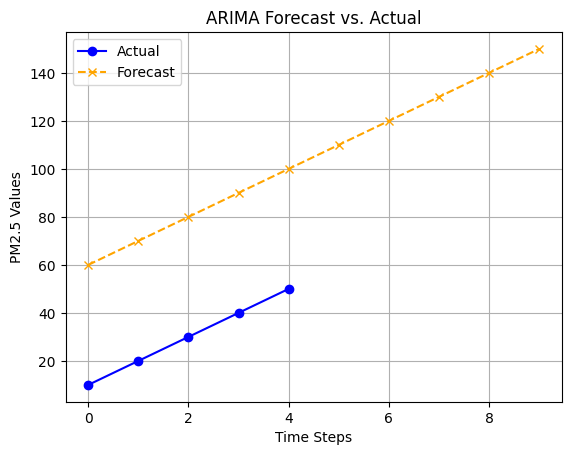

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is already loaded
# Step 1: Print column names of the DataFrame
print("Initial Columns:", df.columns)

# Step 2: Clean column names by removing leading/trailing whitespace
df.columns = df.columns.str.strip()

# Step 3: Verify the first few rows of the DataFrame to confirm data
print("Data Preview:")
print(df.head())

# Step 4: Identify the PM2.5 column
pm25_column = None
for col in df.columns:
    if 'PM2.5' in col:
        pm25_column = col
        break

# Step 5: Handle missing PM2.5 column scenario
if not pm25_column:
    print("Error: No column related to 'PM2.5' found in the DataFrame.")
    print("Available columns:", df.columns.tolist())
else:
    print(f"PM2.5 column found: '{pm25_column}'")

    # Step 6: Handle missing values in the PM2.5 column
    if df[pm25_column].isnull().sum() > 0:
        print(f"Warning: NaN values detected in column '{pm25_column}'. Applying forward fill...")
        df[pm25_column].fillna(method='ffill', inplace=True)

    # Verify if data is present after handling NaNs
    if df[pm25_column].dropna().empty:
        print("Error: No data available in the PM2.5 column after filling NaN values.")
    else:
        # Step 7: Fit the ARIMA model
        print(f"Fitting ARIMA model on '{pm25_column}'...")
        model = ARIMA(df[pm25_column], order=(1, 1, 1))
        model_fit = model.fit()

        # Step 8: Generate forecast for the next 10 time steps
        forecast = model_fit.forecast(steps=10)

        # Use the last 20 rows of data to plot actual values
        actual = df[pm25_column].dropna()[-20:]

        # Step 9: Plot actual vs. forecast values
        print("Plotting actual vs. forecast...")
        plt.plot(range(len(actual)), actual, label='Actual', marker='o', color='blue')
        plt.plot(range(len(forecast)), forecast, label='Forecast', linestyle='--', marker='x', color='orange')
        plt.legend()
        plt.title('ARIMA Forecast vs. Actual')
        plt.xlabel('Time Steps')
        plt.ylabel('PM2.5 Values')
        plt.grid(True)
        plt.show()
